### Counterfactual explanation for question answering

An example of counterfactual explanation on question answering. The method implemented in the library is based on the Polyjuice model developed by Wu et al. Please cite the work: https://github.com/tongshuangwu/polyjuice if using this explainer.

In [1]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
import unittest
from transformers import pipeline
from omnixai.data.text import Text
from omnixai.explainers.nlp.counterfactual.polyjuice import Polyjuice

In [3]:
# Load the pretrained model for question answering
model_name = "deepset/roberta-base-squad2"
model = pipeline('question-answering', model=model_name, tokenizer=model_name)

In [4]:
# Build the prediction function, e.g., the context and question are seperated by "[SEP]".
def _predict(x: Text):
    x = x.split(sep="[SEP]")
    inputs = [{"context": y[0], "question": y[1]} for y in x]
    outputs = model(inputs)
    if isinstance(outputs, dict):
        outputs = [outputs]
    return [output["answer"] for output in outputs]

In [5]:
# Initialize the counterfactual explainer based on Polyjuice
explainer = Polyjuice(predict_function=_predict, mode="qa")

INFO:polyjuice.polyjuice_wrapper:Setup Polyjuice.
INFO:polyjuice.polyjuice_wrapper:Setup SpaCy processor.
INFO:polyjuice.polyjuice_wrapper:Setup perplexity scorer.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


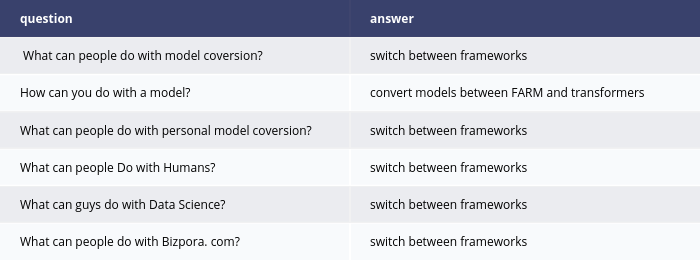

In [6]:
x = Text([
    "The option to convert models between FARM and transformers gives freedom to the user and let people easily switch between frameworks. [SEP] "
    "What can people do with model coversion?",
    "Electric vehicles emit much less harmful pollutants than conventional vehicles and ultimately, create a cleaner environment for human beings. [SEP] "
    "what is the result of using eletric vehicles?"
])
explanations = explainer.explain(x)
explanations.ipython_plot(index=0)

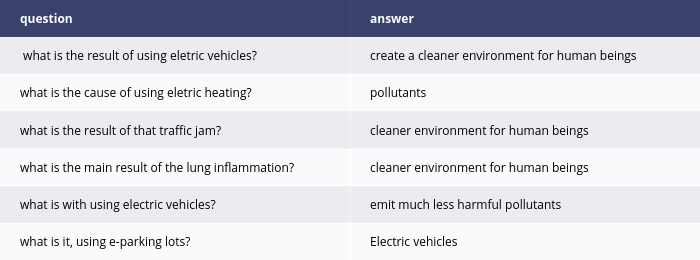

In [7]:
explanations.ipython_plot(index=1)